In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("income_evaluation.csv")
print(df.shape)
df.head(5)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [4]:
df.columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
             'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country', 'income']

In [5]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
#converting the values of income colm to 0s and 1s
df['income']=[1 if value ==' >50K' else 0 for value in df['income'].values]

In [8]:
df.tail(5)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [9]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
df['workclass'] = np.where(df.workclass == ' ?', np.nan, df['workclass'])

In [11]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [14]:
workclass_label = {v:k for k, v in enumerate(df.workclass.unique())}

In [15]:
workclass_label

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6,
 ' Never-worked': 7}

In [16]:
df.workclass=df.workclass.map(workclass_label)

In [17]:
workclass_label

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6,
 ' Never-worked': 7}

In [18]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [19]:
education_label={v:k for k,v in enumerate(df.education.unique())}
education_label

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' Preschool': 13,
 ' 12th': 14,
 ' 1st-4th': 15}

In [20]:
df.education=df.education.map(education_label)

<AxesSubplot:xlabel='income', ylabel='count'>

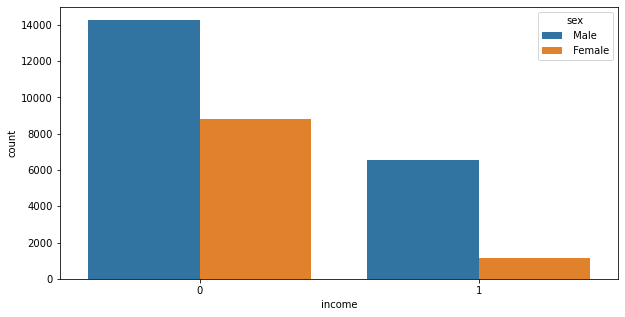

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='income',data=df,hue='sex')

In [22]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [23]:
native_country=df.native_country.value_counts()
native_country

 United-States                 27511
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

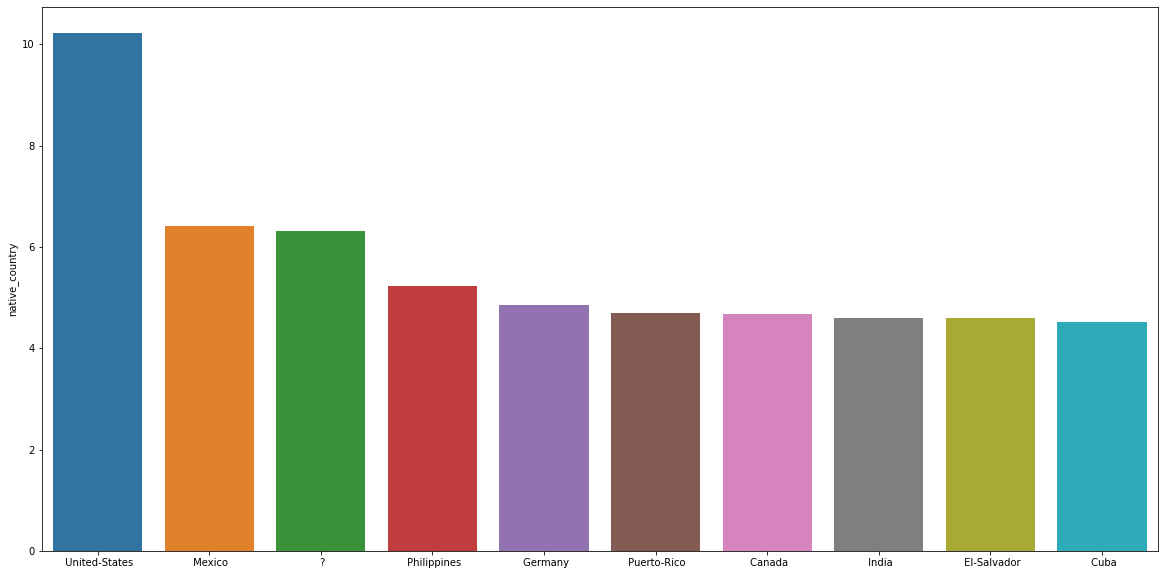

In [24]:
native_country=df.native_country.value_counts().nlargest(10)
plt.figure(figsize=(20,10))
sns.barplot(x=native_country.index,y=np.log(native_country));

In [25]:
df.native_country = np.where(df.native_country == ' ?', np.nan, df['native_country'])

In [26]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
df.dropna(axis=0,inplace=True)

In [28]:
native_country={v:k for k,v in enumerate(df.native_country.unique())}
native_country

{' United-States': 0,
 ' Cuba': 1,
 ' Jamaica': 2,
 ' India': 3,
 ' Mexico': 4,
 ' Puerto-Rico': 5,
 ' Honduras': 6,
 ' England': 7,
 ' Canada': 8,
 ' Germany': 9,
 ' Iran': 10,
 ' Philippines': 11,
 ' Poland': 12,
 ' Columbia': 13,
 ' Cambodia': 14,
 ' Thailand': 15,
 ' Ecuador': 16,
 ' Laos': 17,
 ' Taiwan': 18,
 ' Haiti': 19,
 ' Portugal': 20,
 ' Dominican-Republic': 21,
 ' El-Salvador': 22,
 ' France': 23,
 ' Guatemala': 24,
 ' Italy': 25,
 ' China': 26,
 ' South': 27,
 ' Japan': 28,
 ' Yugoslavia': 29,
 ' Peru': 30,
 ' Outlying-US(Guam-USVI-etc)': 31,
 ' Scotland': 32,
 ' Trinadad&Tobago': 33,
 ' Greece': 34,
 ' Nicaragua': 35,
 ' Vietnam': 36,
 ' Hong': 37,
 ' Ireland': 38,
 ' Hungary': 39,
 ' Holand-Netherlands': 40}

In [29]:
df.native_country=df.native_country.map(native_country)

In [30]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0
1,50,1,83311,0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,0
2,38,2,215646,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0
3,53,2,234721,2,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0
4,28,2,338409,0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,1,0


In [31]:
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [32]:
marital_label={v:k for k,v in enumerate(df.marital_status.unique())}
marital_label

{' Never-married': 0,
 ' Married-civ-spouse': 1,
 ' Divorced': 2,
 ' Married-spouse-absent': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

In [33]:
df.marital_status

0              Never-married
1         Married-civ-spouse
2                   Divorced
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32556     Married-civ-spouse
32557     Married-civ-spouse
32558                Widowed
32559          Never-married
32560     Married-civ-spouse
Name: marital_status, Length: 30169, dtype: object

In [34]:
df.marital_status=df.marital_status.map(marital_label)

In [35]:
#df.marital_status

In [36]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [37]:
df.occupation = np.where(df.occupation == ' ?', np.nan, df['occupation'])

In [38]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', nan], dtype=object)

In [39]:
df.dropna(axis=0,inplace=True)

In [40]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [41]:
occupation_label={v:k for k,v in enumerate(df.occupation.unique())}
occupation_label

{' Adm-clerical': 0,
 ' Exec-managerial': 1,
 ' Handlers-cleaners': 2,
 ' Prof-specialty': 3,
 ' Other-service': 4,
 ' Sales': 5,
 ' Transport-moving': 6,
 ' Farming-fishing': 7,
 ' Machine-op-inspct': 8,
 ' Tech-support': 9,
 ' Craft-repair': 10,
 ' Protective-serv': 11,
 ' Armed-Forces': 12,
 ' Priv-house-serv': 13}

In [42]:
df.occupation=df.occupation.map(occupation_label)

In [43]:
#df.occupation

In [44]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [45]:
relationship_label={v:k for k,v in enumerate(df.relationship.unique())}
relationship_label

{' Not-in-family': 0,
 ' Husband': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [46]:
df.relationship=df.relationship.map(relationship_label)

In [47]:
df.relationship

0        0
1        1
2        0
3        1
4        2
        ..
32556    2
32557    1
32558    4
32559    3
32560    2
Name: relationship, Length: 30162, dtype: int64

In [48]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,White,Male,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,White,Male,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,White,Male,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,Black,Male,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,Black,Female,0,0,40,1,0


In [49]:
#df.sex=np.where(df.sex=='Male',1,0)

In [50]:
df.sex.unique()

array([' Male', ' Female'], dtype=object)

In [51]:

df['sex'] = df['sex'].map({' Male': 1,' Female': 0})


In [52]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,White,1,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,White,1,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,White,1,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,Black,1,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,Black,0,0,0,40,1,0


In [54]:
df.sex.unique()

array([1, 0], dtype=int64)

In [55]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [56]:
race_label={v:k for k,v in enumerate(df.race.unique())}
race_label

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [57]:
df.race=df.race.map(race_label)

In [59]:
#df.race

In [60]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,1,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,1,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,1,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,1,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


<AxesSubplot:>

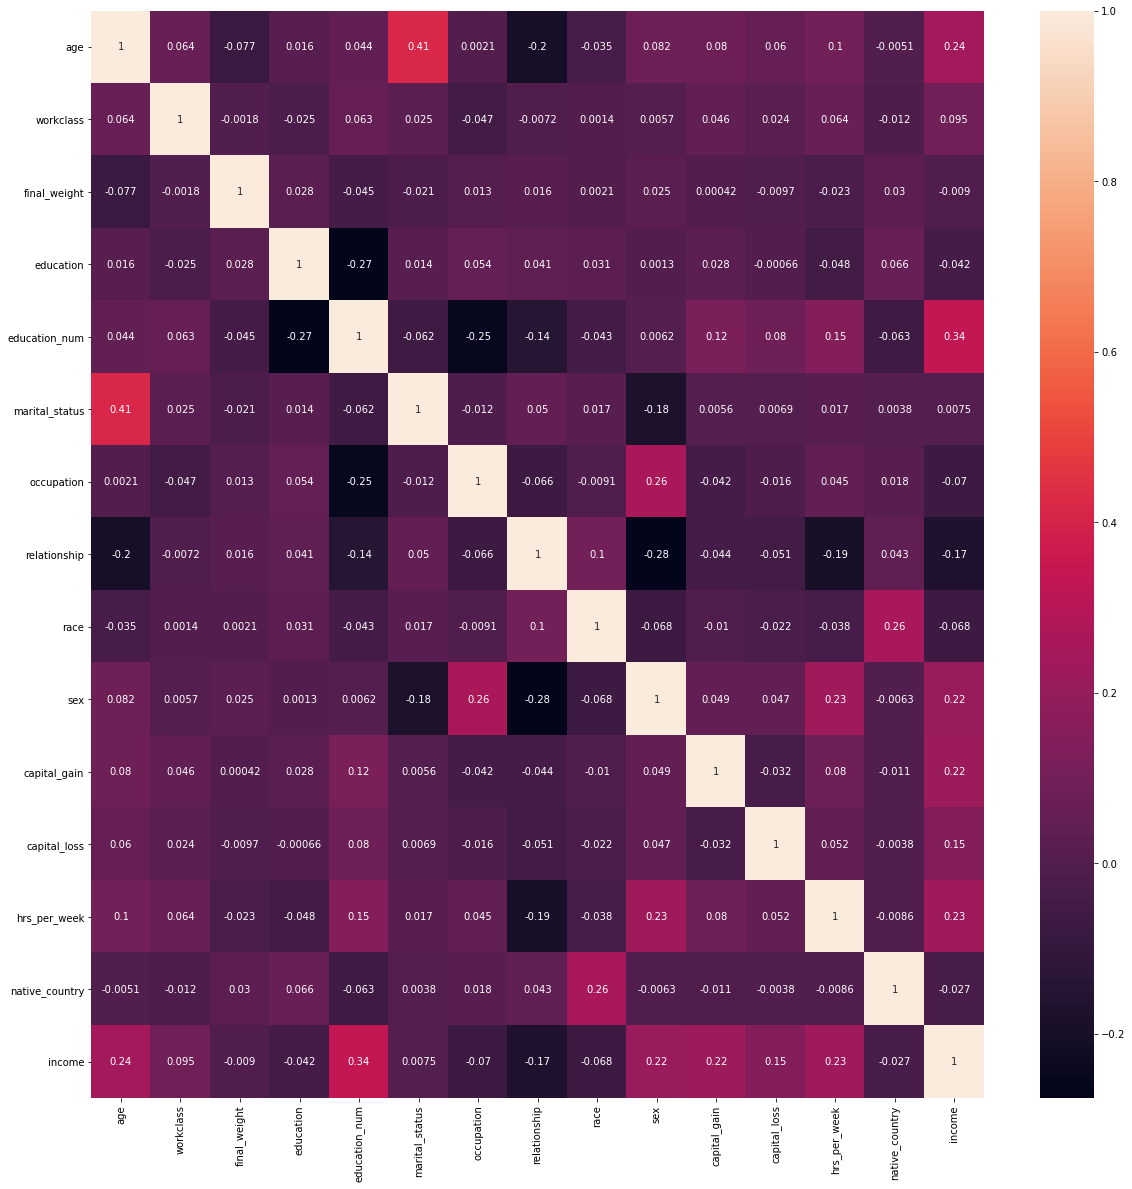

In [63]:
#correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [70]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


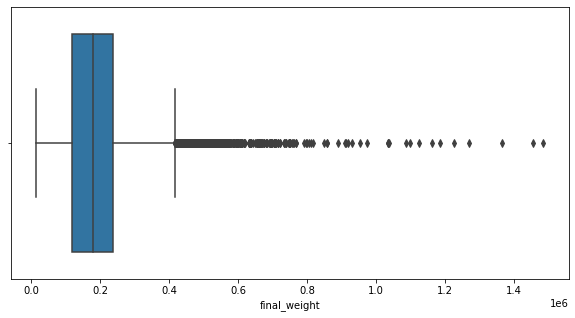

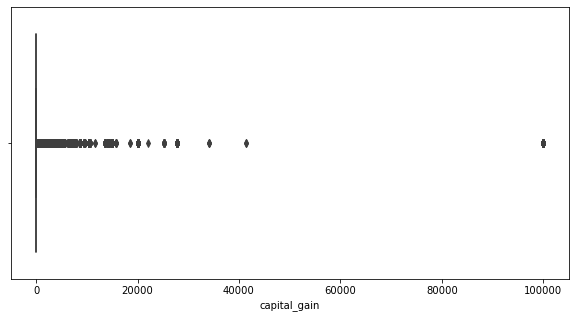

In [71]:
for data in ['final_weight','capital_gain']:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[data])

In [74]:
df.describe()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.109343,1.897938e+05,3.368842,10.121312,1.075061,4.615609,1.523971,0.211823,0.675685,1092.007858,88.372489,40.931238,1.183509,0.248922
std,13.134665,0.934785,1.056530e+05,3.404320,2.549995,1.217557,3.432195,1.431980,0.612461,0.468126,7406.346497,404.298370,11.979984,4.947070,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.000000,13.000000,1.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)


In [82]:
from sklearn.preprocessing import StandardScaler

In [84]:
x=df.iloc[:,:-1]
x

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
0,39,0,77516,0,13,0,0,0,0,1,2174,0,40,0
1,50,1,83311,0,13,1,1,1,0,1,0,0,13,0
2,38,2,215646,1,9,2,2,0,0,1,0,0,40,0
3,53,2,234721,2,7,1,2,1,1,1,0,0,40,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,9,2,0,0,0,0,38,0
32557,40,2,154374,1,9,1,8,1,0,1,0,0,40,0
32558,58,2,151910,1,9,6,0,4,0,0,0,0,40,0
32559,22,2,201490,1,9,0,0,3,0,1,0,0,20,0


In [85]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 30162, dtype: int64

In [86]:
sc=StandardScaler()
sc.fit_transform(x)

array([[ 0.04279571, -2.25653747, -1.0627216 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [ 0.88028814, -1.18675527, -1.00787131, ..., -0.21858598,
        -2.3315307 , -0.23923831],
       [-0.03333996, -0.11697307,  0.24469349, ..., -0.21858598,
        -0.07773411, -0.23923831],
       ...,
       [ 1.48937355, -0.11697307, -0.3585745 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [-1.25151078, -0.11697307,  0.11070545, ..., -0.21858598,
        -1.74721307, -0.23923831],
       [ 1.0325595 ,  3.09237353,  0.92884082, ..., -0.21858598,
        -0.07773411, -0.23923831]])

# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lg=LogisticRegression()

In [90]:
lg.fit(x_train,y_train)

LogisticRegression()

In [91]:
pred=lg.predict(x_test)

# Accuracy Testing

In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [106]:
print("CLASSIFICATION REPORT")
print(classification_report(y_test,pred))
print()
print()

print("ACCURACY SCORE")
print("Accuracy of the model: {0}%".format(accuracy_score(y_test,pred)*100))
print()
print()


print("CONFUSION MATRIX")
print(confusion_matrix(y_test,pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      5642
           1       0.73      0.26      0.38      1899

    accuracy                           0.79      7541
   macro avg       0.76      0.61      0.63      7541
weighted avg       0.78      0.79      0.75      7541



ACCURACY SCORE
Accuracy of the model: 78.98156743137514%


CONFUSION MATRIX
[[5463  179]
 [1406  493]]


<AxesSubplot:>

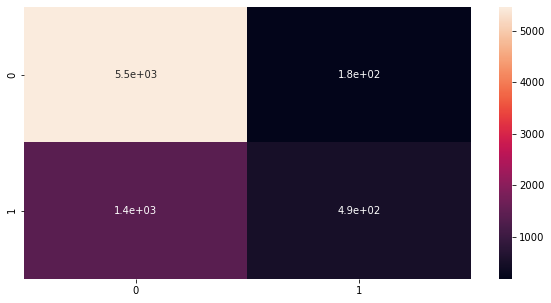

In [105]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)